In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
reviews_df = pd.read_csv("../data/raw/final_project_train_dataset/train.csv", sep=',')
reviews_df.head(5)

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


# Initial dataset analysis.

In the following section we will focus on general raw data analysis and aggregated metrics of this dataset. 
Since the only raw data available is a text-field, also its main characteristics will be analysed to extract more features necessary for modeling (like number of tokens, signs, language, review length and so on).

## General dataset investigation.

1. General number of rows.
2. Duplicated rows.
3. Innacuracies related to different sentiment for the same review.

In [3]:
reviews_df.describe().T

,count,unique,top,freq
review,40000,39728,Loved today's show!!! It was a variety and not...,5
sentiment,40000,2,positive,20000


In [4]:
duplicated_reviews_df = pd.concat(g for _, g in reviews_df.groupby("review") if len(g) > 1)[['review', 'sentiment']]
duplicated_reviews_df

,review,sentiment
3395,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
31957,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
6182,"""Three"" is a seriously dumb shipwreck movie. M...",negative
36230,"""Three"" is a seriously dumb shipwreck movie. M...",negative
27297,(Spoilers)<br /><br />Oh sure it's based on Mo...,negative
...,...,...
28924,it's amazing that so many people that i know h...,positive
15038,this is the worst film I've seen in a long lon...,negative
32689,this is the worst film I've seen in a long lon...,negative
2145,"when I first heard about this movie, I noticed...",positive


In [5]:
aggregated_duplicates_df = duplicated_reviews_df.groupby("review").agg("nunique")
aggregated_duplicates_df[aggregated_duplicates_df['sentiment'] > 1]

,sentiment
review,


In [6]:
aggregated_duplicates_df['sentiment'].max()

1

In [7]:
duplicated_reviews_df['review'].nunique()

266

## `review` column investigation.

1. Empty values.
2. Distribution of number of characters in review.
3. Distribution of number of 'words' in review.

In [8]:
reviews_df['review'].isnull().sum()

0

In [9]:
reviews_df['review'].replace('', None).isnull().sum()

0

[Text(0.5, 0, 'Characters in review')]

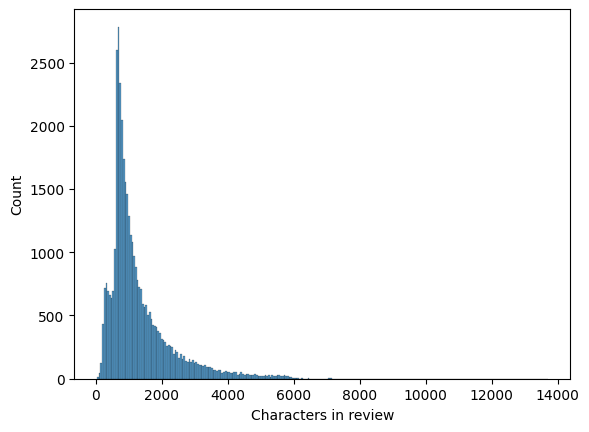

In [10]:
ax = sns.histplot(data=reviews_df['review'].apply(len), stat='count')
ax.set(xlabel="Characters in review")

[Text(0.5, 0, 'Words separated with space in review')]

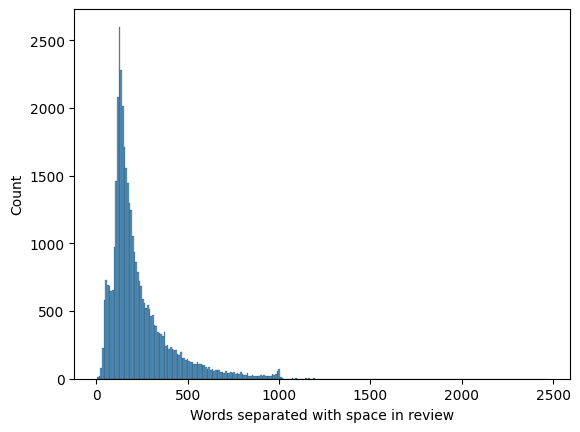

In [11]:
ax = sns.histplot(data=reviews_df['review'].apply(lambda x: len(x.split())), stat='count')
ax.set(xlabel="Words separated with space in review")

## `sentiment` column investigation.

1. Empty values.
2. Number of positive and negative sentiments.

In [12]:
reviews_df['sentiment'].isnull().sum()

0

<Axes: xlabel='sentiment', ylabel='Count'>

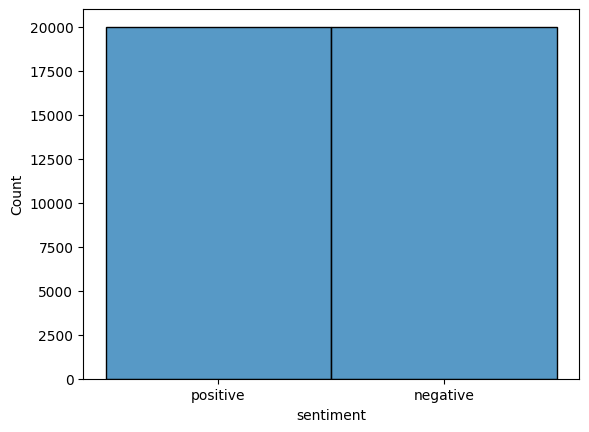

In [13]:
sns.histplot(data=reviews_df['sentiment'], stat='count')

# `review` column characteristics investigation.

Current section is dedicated to investigation of `review` feature in details. General length and distribution was covered. Now we are interested in language, valid / invalid tokens, language, signs and further preprocessing actions.

## Main features extraction.

1. Number of words and characters.
2. Percentage of signs in a review.
3. Number of exclamation, question marks and ellipses.
4. Number of words, written with uppercase.

In [14]:
reviews_df['number_of_words'] = reviews_df['review'].apply(lambda x: len(x.split()))
reviews_df['number_of_chars'] = reviews_df['review'].apply(len)
reviews_df['percentage_of_signs'] = reviews_df['review'].apply(lambda x: sum([1 for c in x if not c.isalpha()]) / len(x) * 100)
reviews_df['number_of_excl_marks'] = reviews_df['review'].apply(lambda x: x.count('!'))
reviews_df['number_of_question_marks'] = reviews_df['review'].apply(lambda x: x.count('?'))
reviews_df['number_of_ellipses'] = reviews_df['review'].apply(lambda x: x.count('...'))
reviews_df['number_of_uppercase_words'] = reviews_df['review'].apply(lambda x: sum([1 for w in x.split() if re.sub(r'[^a-zA-Z]', '', w).isupper()]))

numerical_review_features = [
    'number_of_words',
    'number_of_chars',
    'percentage_of_signs',
    'number_of_excl_marks',
    'number_of_question_marks',
    'number_of_ellipses',
    'number_of_uppercase_words'
]

In [15]:
reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_words,40000.0,231.362750,171.083908,4.000000,126.000000,173.00000,282.000000,2470.000000
number_of_chars,40000.0,1310.549450,987.955229,41.000000,699.000000,971.00000,1595.000000,13704.000000
percentage_of_signs,40000.0,21.977625,1.825969,11.764706,20.805369,21.83136,22.940277,87.311178
number_of_excl_marks,40000.0,0.971950,2.957310,0.000000,0.000000,0.00000,1.000000,282.000000
number_of_question_marks,40000.0,0.645175,1.495052,0.000000,0.000000,0.00000,1.000000,35.000000
number_of_ellipses,40000.0,0.499400,1.580463,0.000000,0.000000,0.00000,0.000000,48.000000
number_of_uppercase_words,40000.0,4.878900,5.585357,0.000000,1.000000,3.00000,6.000000,151.000000


## Correlations between `review` features.

1. Pearson correlation matrix.
2. Kendall correlation matrix.
3. Spearman correlation matrix.

<Axes: >

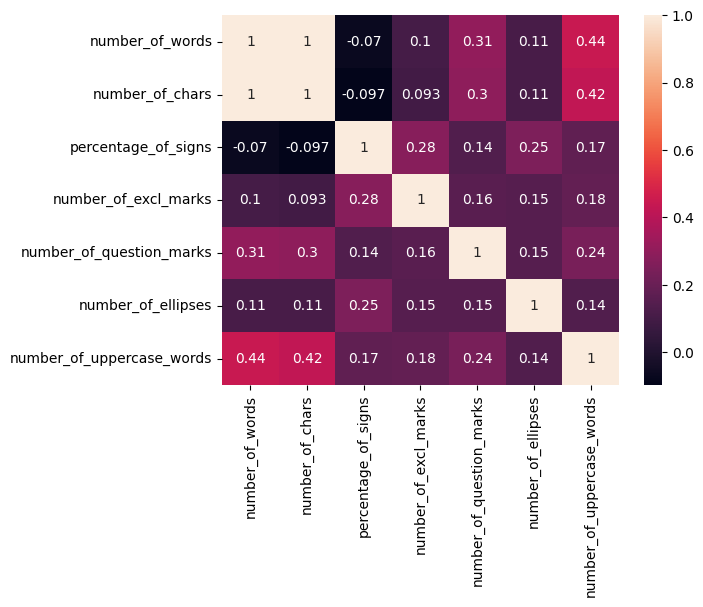

In [16]:
corr = reviews_df[numerical_review_features].corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

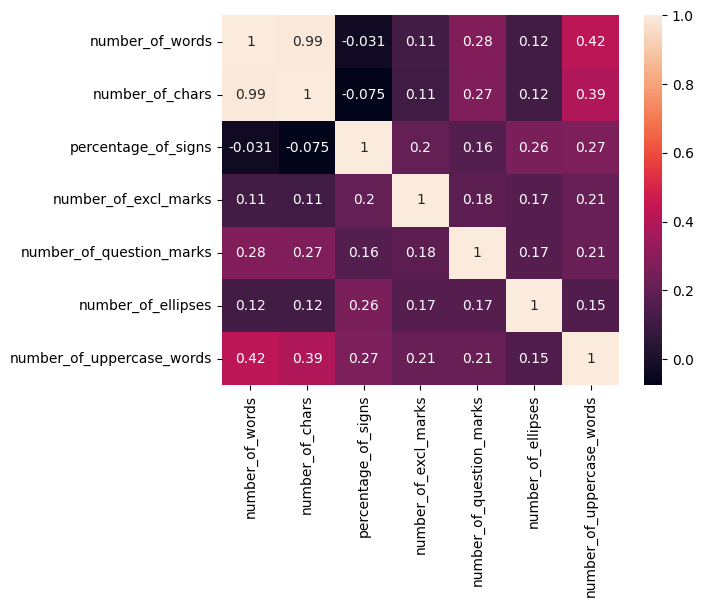

In [17]:
corr = reviews_df[numerical_review_features].corr(method='spearman')
sns.heatmap(corr, annot=True)

<Axes: >

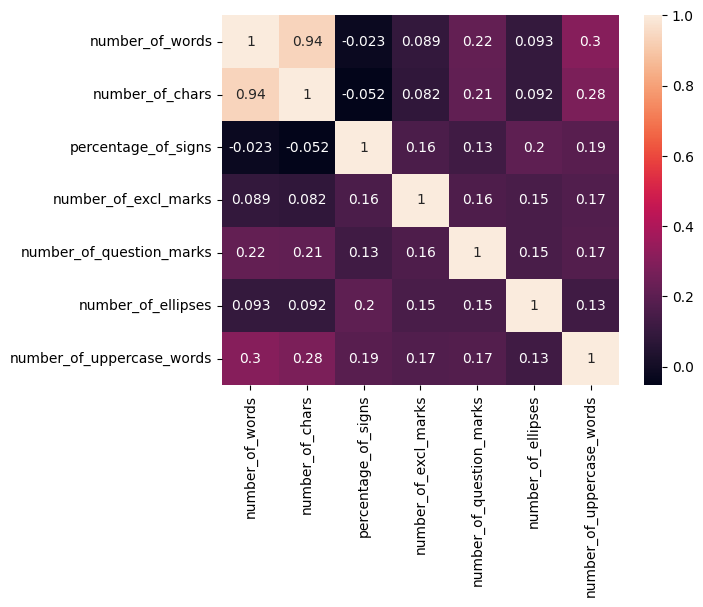

In [18]:
corr = reviews_df[numerical_review_features].corr(method='kendall')
sns.heatmap(corr, annot=True)

## Unusual words and signs.

1. Number and appearance of words, containing non-alphabetical characters.
2. Average number of signs in review.

[Text(0.5, 0, 'Percentage of sign characters in review')]

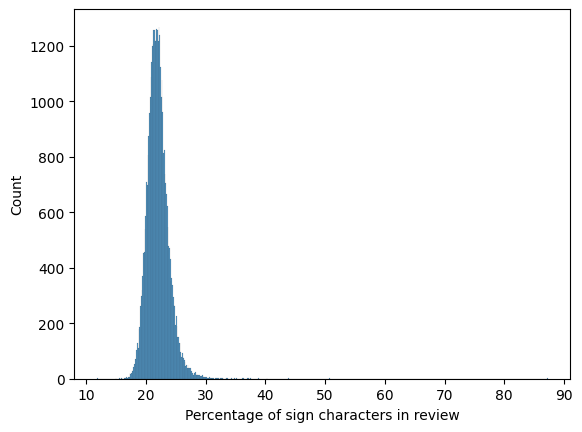

In [19]:
ax = sns.histplot(data=reviews_df['percentage_of_signs'], stat='count')
ax.set(xlabel="Percentage of sign characters in review")

In [20]:
simple_word_regex = re.compile(r'[a-zA-Z]+')
unusual_words = set(reviews_df['review'].apply(lambda x: [w for w in x.split() if not simple_word_regex.match(w)]).sum())

In [21]:
unusual_words

{'"Turbulence"-movies',
 '"atrocious".<br',
 '.....whoops',
 '(1953)',
 '"Manhattan"',
 '1979-1981',
 '`disco',
 '"Paris,',
 '/>Girls',
 "'Predator'",
 '/>Again,',
 '(whoops!).',
 '"charisma,"',
 '"easier',
 '/>MacGregor',
 '"Imperialism"',
 "'damsel'",
 '(today,',
 '/>2007',
 '/>"Blithe',
 '(yes)',
 "/>We've",
 '/>"King',
 '/>André',
 '"Puerto',
 '(1989)?',
 '(argued',
 "(Elf's",
 '"Belly',
 '2005/early',
 '(Everett',
 '(O-Lane)',
 '"great",',
 '"coldblooded"<br',
 '"cold".',
 "80's-style",
 '#4).',
 '-Kung',
 '"how"',
 '(Four',
 '[Which',
 '"hair',
 '/>Guest',
 '(Shrek,',
 '/>Nope.<br',
 '**Spoiler**',
 '(63',
 '!!!7!!!',
 '"Boomerang"',
 "'Lone",
 '"mainstream,"',
 '"Edgar',
 '/>!!!!!',
 '(ALTHOUGH',
 '(Jeremy',
 '"Amazing',
 "'raciest'",
 '(1939),',
 '40-45',
 '"engage"',
 '"...Gilbert',
 '"Nuovomondo',
 '"Ice',
 '"ratbatspidercrab."',
 '"soldiers",',
 '74"',
 '"Piece',
 "'sell",
 "'Renassaince'",
 '¨the',
 '"STRANGERS',
 '(most',
 '(Gregg',
 '/>Evidently,',
 '(Kappa',
 '*too',
 '/

## Outliers overview.

1. Reviews with min / max number of chars.
2. Reviews with min / max number of exclamation, question signs and ellipses.
3. Reviews with min / max percentage of signs.

In [22]:
df_sorted_by_chars = reviews_df.sort_values(by='number_of_chars')['review'].to_list()
df_sorted_by_signs = reviews_df.sort_values(by='percentage_of_signs')['review'].to_list()

df_sorted_by_excl = reviews_df.sort_values(by='number_of_excl_marks')['review'].to_list()
df_sorted_by_question = reviews_df.sort_values(by='number_of_question_marks')['review'].to_list()
df_sorted_by_ellipses = reviews_df.sort_values(by='number_of_ellipses')['review'].to_list()
df_sorted_by_uppercase = reviews_df.sort_values(by='number_of_uppercase_words')['review'].to_list()

In [23]:
def print_edge_cases(
    sorted_list,
    number_of_cases,
    tail = False
) -> None:
    print(f"\nFirst {number_of_cases} from {'head' if not tail else 'tail'}:")
    cases_to_print = sorted_list[:number_of_cases] if not tail else sorted_list[len(sorted_list)-number_of_cases:]

    for review in cases_to_print:
        print("\t", review, "\n")

In [24]:
print_edge_cases(df_sorted_by_chars, 5)
print_edge_cases(df_sorted_by_chars, 3, True)


First 5 from head:
	 What a script, what a story, what a mess! 

	 I hope this group of film-makers never re-unites. 

	 Primary plot!Primary direction!Poor interpretation. 

	 This movie is terrible but it has some good effects. 

	 I wouldn't rent this one even on dollar rental night. 


First 3 from tail:
	 Back in the mid/late 80s, an OAV anime by title of "Bubblegum Crisis" (which I think is a military slang term for when technical equipment goes haywire) made its debut on video, taking inspiration from "Blade Runner", "The Terminator" and maybe even "Robocop", with a little dash of Batman/Bruce Wayne - Iron Man/Tony Stark and Charlie's Angel's girl power thrown in for good measure. 8 episodes long, the overall story was that in 21st century Tokyo, Japan, year 2032-2033, living machines called Boomers were doing manual labor and sometimes cause problems. A special, SWAT like branch of law enforcers, the Advanced Police (AD Police for short) were formed to handle the boomers, but 

In [25]:
print_edge_cases(df_sorted_by_signs, 5)
print_edge_cases(df_sorted_by_signs, 5, True)


First 5 from head:
	 Primary plot!Primary direction!Poor interpretation. 

	 Brilliant and moving performances by Tom Courtenay and Peter Finch. 

	 .....whoops - looks like it's gonna cost you a whopping £198.00 to buy a copy (either DVD or Video format)from ITV direct.<br /><br />Ouch.<br /><br />Sorry about this, but IMDB won't let me submit this comment unless it has at least 10 lines, so...........<br /><br />blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah blahblah !!<br /><br /> 

	 I had to watch this movie for professional reasons and can only say it's a complete waste of time. When running, Ba

In [26]:
print_edge_cases(df_sorted_by_uppercase, 5, True)


First 5 from tail:
	 Was'nt really bad for Raw's first PPV of 006. But the ending was really really shocking to everyone in attendance & the ones who were watching at home.<br /><br />FIRST MATCH- RIC FLAIR VS. EDGE W/ LITA FOR THE WWE INTERCONTINENTAL CHAMPIONSHIP Not a bad opener, these two can seriously put on a great match if they had more time to put on a wrestling match. Flair wins by DQ after Edge slams him with his MITB briefcase. 3/10 SECOND MATCH- TRISH STRATUS VS. MICKIE JAMES FOR THE WWE WOMEN'S CHAMPIONSHIP Not bad noticing the fact that this is the first time these Divas faced off in the ring together. Mickie goes for a modified Chick Kick, but Trish ducks & nails her own Chick Kick for the win to retain her title. 3/10 THIRD MATCH- TRIPLE H VS. BIG SHOW Seriously good this match was, really. The whole match HHH focuses on Big Show's injured arm but Big Show still fights back. Later HHH is able to topple down Big Show & nails a Pedigree for the win. 5/10 FOURTH MATCH- SH

# Correlations investigation.

In current section we will focus on basic correlation investigation between the simpliest `review` characteristics (such as length, number of words, percentage of signs, etc.) and a `sentiment`.

## Distribution of `review` features for different sentiments.

1. How all mean / min / max / avg of distinct features differs in positive and negative sentiments.
2. Outliers investigation. 

In [27]:
reviews_df.groupby(['sentiment']).describe().T

sentiment                            negative      positive
number_of_words           count  20000.000000  20000.000000
                          mean     230.186850    232.538650
                          std      165.642483    176.353828
                          min        4.000000     10.000000
                          25%      128.000000    125.000000
                          50%      174.000000    172.000000
                          75%      280.000000    284.000000
                          max     1522.000000   2470.000000
number_of_chars           count  20000.000000  20000.000000
                          mean    1298.143300   1322.955600
                          std      950.224379   1024.170719
                          min       41.000000     65.000000
                          25%      705.000000    692.000000
                          50%      974.000000    968.000000
                          75%     1576.000000   1614.000000
                          max     8969.000000  13704.000000
percentage_of_signs       count  20000.000000  20000.000000
                          mean      22.163721     21.791530
                          std        1.776076      1.856013
                          min       11.764706     14.925373
                          25%       20.985011     20.629241
                          50%       22.025873     21.639938
                          75%       23.125000     22.758413
                          max       38.847858     87.311178
number_of_excl_marks      count  20000.000000  20000.000000
                          mean       1.009400      0.934500
                          std        2.540263      3.322057
                          min        0.000000      0.000000
                          25%        0.000000      0.000000
                          50%        0.000000      0.000000
                          75%        1.000000      1.000000
                          max       70.000000    282.000000
number_of_question_marks  count  20000.000000  20000.000000
                          mean       0.905000      0.385350
                          std        1.825881      1.000802
                          min        0.000000      0.000000
                          25%        0.000000      0.000000
                          50%        0.000000      0.000000
                          75%        1.000000      0.000000
                          max       35.000000     16.000000
number_of_ellipses        count  20000.000000  20000.000000
                          mean       0.599500      0.399300
                          std        1.664343      1.485183
                          min        0.000000      0.000000
                          25%        0.000000      0.000000
                          50%        0.000000      0.000000
                          75%        1.000000      0.000000
                          max       48.000000     48.000000
number_of_uppercase_words count  20000.000000  20000.000000
                          mean       5.171500      4.586300
                          std        5.608267      5.547079
                          min        0.000000      0.000000
                          25%        2.000000      1.000000
                          50%        4.000000      3.000000
                          75%        7.000000      6.000000
                          max      151.000000    126.000000

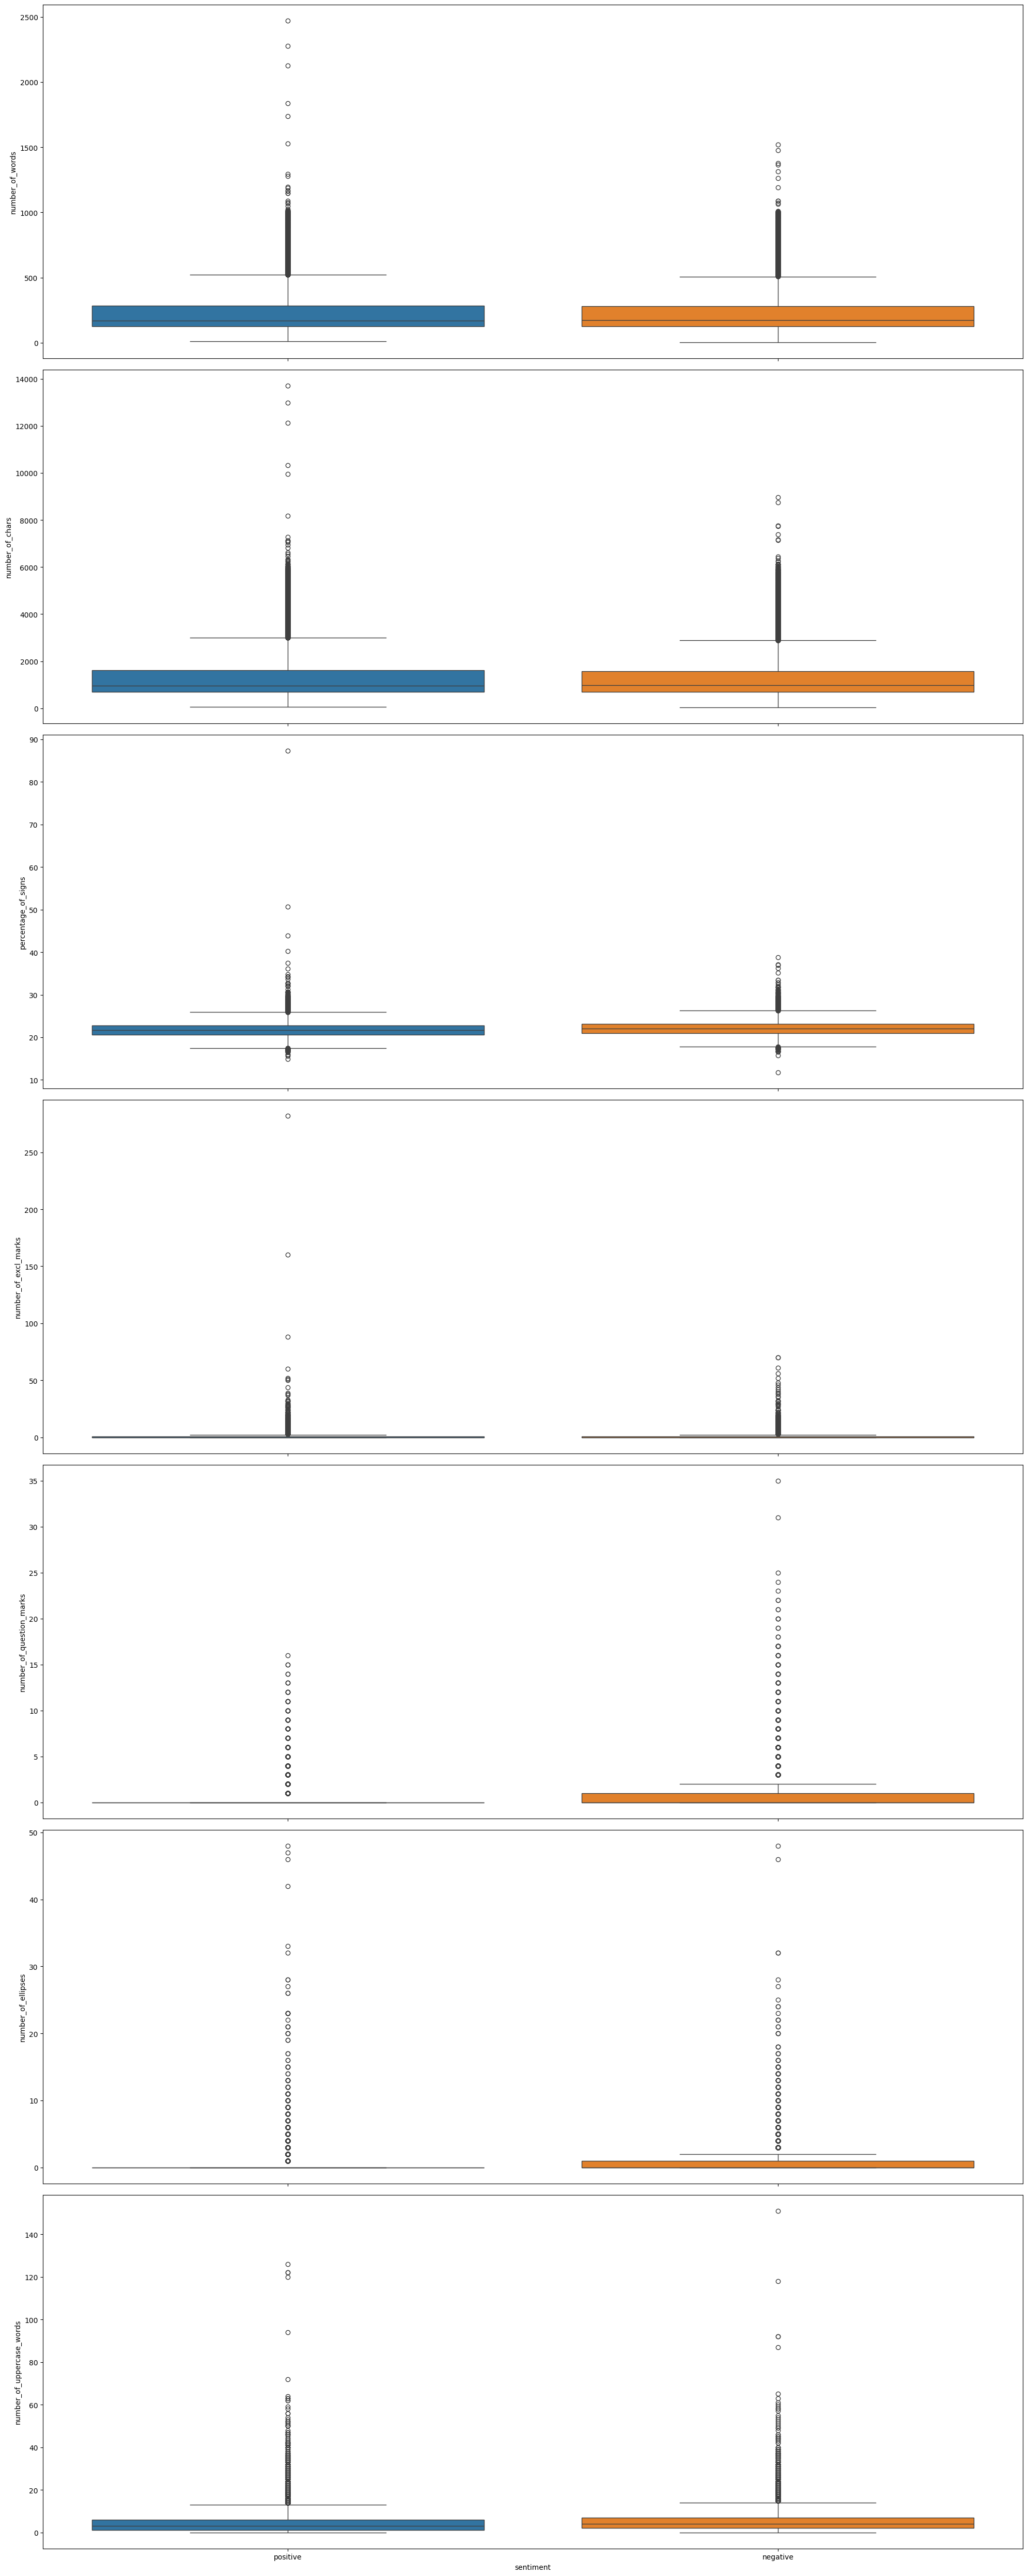

In [28]:
fig, axs = plt.subplots(nrows=len(numerical_review_features), sharex=True, figsize=(20, 50))
for i, f in enumerate(numerical_review_features):
    p = sns.boxplot(data=reviews_df[['sentiment', f]], x='sentiment', y=f, ax=axs[i], hue='sentiment')
    p.tick_params(labelsize=10)
    
plt.tight_layout()

# Analysis Summary.

## Main results from analysis.

### Initial dataset analysis results:
1. 40'000 rows in training dataset in total.
2. There are 272 duplicated rows and 266 duplicated reviews in total.
3. There are no same reviews with different sentimental.
4. There are no `null` or empty string values in both `review` and `sentiment` columns.
5. Length of characters / words in review are skewed left.
6. Mean number of words in review is 231 and mean number of chars -- 1310. While maximum number of chars is more than 13'000. Maximum number of words is 2'500.
7. There are equal amount of positive and negative sentiments (20'000 rows for both).

### `review` column analysis results:

The following numerical features of reviews were investigated: 
```
'number_of_words'
'number_of_chars'
'percentage_of_signs'
'number_of_excl_marks'
'number_of_question_marks'
'number_of_ellipses'
'number_of_uppercase_words'
```
1. There is no high correlation between them (considering Pearson, Kendall and Spearman correlation coefficients), except obvious dependency between number of words and characters.
2. Average ratio of non-alphabetical chars in review is 21% (which is pretty high), therefore more careful analysis was done to detect whether some of punctuation signs may correlate with a sentiment.
3. Average number of uppercase words is 4 with 151 maximum, therefore is was considered as a separate feature, that could also correlate with a sentiment.
4. In texts appears fragments `<br />`, `blablablabla+`, ` >>>>>>> `, `*[word]*`, `........`, `?[word]?`, `[word]-[word]-[word]` and other noise, which must be carefully processed during tockenization.
5. There are vast amount of words like `oh`, `ah`, `wow`, etc., which should be preserved as tokens.

   
### Correlation investigation results:

1. Were obtained, that `number_of_ellipses` and `number_of_question_marks` are higher for negative sentiments.
2. For other `numerical_review_features` boxplots showed no significant difference in distributions between positive and negative sentiments.
